1) Load necessary libraries

In [2]:
import pandas as pd                       # importing pandas libarary, pyton data analysis library 
pd.set_option('display.max_rows', None)   # to retrieve output for all rows

import numpy as np                        # importing numpy or python array object library 
import seaborn as sn
import matplotlib.pyplot as plt           # importing matplotlib library, python data visualization library 
%matplotlib inline
import statistics as st 

from sklearn.model_selection import train_test_split          # importing data splitter 
from sklearn.metrics import accuracy_score                    # importing accuracy score to determine model accuracy 
from sklearn.metrics import confusion_matrix                  # importing confution matrix 
from sklearn.metrics import classification_report

2) Load data file

In [3]:
df = pd.read_excel("C:/Users/Asus/Desktop/Data/research/Defect_Occurrence.xlsx")

In [4]:
df.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3,1
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5,0
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8,1
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5,1
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9,1


3) Random Forest Classifier

In [5]:
# remove response variable column from data frame

X = df.drop(['Defect_Occurrence'], axis=1)
X.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9


In [6]:
# Load response variable to seperate dataframe

y = df['Defect_Occurrence'].values

In [7]:
# Data spliting for training and testinf sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% for training and 30% for testing

# train set is used to train the model meaning; find weights and biases. 

# Random state ensures that the splits generate are reproducible. 
# Scikit-learn uses random permutations to generate the splits.
# If random_state is not specified every timethe code is run(execute) a new random value is generated and 
# the train and test datasets would have different values each time.
# random_state = 0 or 1 or 42 or any other integer. Then result would be the same during every execute.

print("Training Data Shape of X :",X_train.shape)
print("Training Data Shape of y :",y_train.shape)
print("Testing Data Shape of X :",X_test.shape)
print("Testing Data Shape of y :",y_test.shape)

Training Data Shape of X : (1008, 19)
Training Data Shape of y : (1008,)
Testing Data Shape of X : (432, 19)
Testing Data Shape of y : (432,)


In [8]:
# Extract predicted output

expected_output = y_test

In [9]:
from sklearn.ensemble import RandomForestClassifier                      # import Random Forest Model

RF = RandomForestClassifier(n_estimators=200) #create naive bayes classifier
RF.fit(X_train, y_train) # train the model
y_prediction_8 = RF.predict(X_test) # predict response for test data set

print('\nTraining accuracy of the Random Forest Classifier :', RF.score(X_train, y_train) )
print('\nTesting accuracy of the Random Forest Classifier :', RF.score(X_test, y_test) )


Training accuracy of the Random Forest Classifier : 0.9484126984126984

Testing accuracy of the Random Forest Classifier : 0.9166666666666666


In [10]:
print('\nClassification Report')
print(classification_report(y_prediction_8, expected_output))

print('\nConfusion Matrix')
print(confusion_matrix(y_prediction_8, expected_output))


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       207
           1       0.96      0.88      0.92       225

    accuracy                           0.92       432
   macro avg       0.92      0.92      0.92       432
weighted avg       0.92      0.92      0.92       432


Confusion Matrix
[[198   9]
 [ 27 198]]


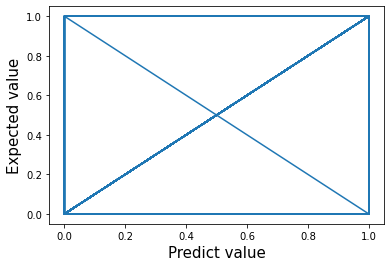

In [11]:
plt.plot(y_prediction_8, expected_output)
plt.xlabel('Predict value', fontsize=15)
plt.ylabel('Expected value', fontsize=15)
plt.show()

In [12]:
# loss function
from sklearn.metrics import log_loss

print('The binary cross entropy loss is : %f' % log_loss(y_prediction_8, expected_output))

The binary cross entropy loss is : 2.878248


In [13]:
 # Random Forest 

df8 = pd.DataFrame({'Actual': y_test, 'Predicted':y_prediction_8})
df8

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,1
8,0,0
9,0,0


4) Cross validation

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn import model_selection

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [15]:
# K-fold Cross-Validation

kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.4f%%" % (results_kfold.mean())) 

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.9042%


In [16]:
# Stratified K-fold Cross-Validation

skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.4f%%" % (results_skfold.mean()))

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.9285%


In [17]:
# Leave One Out Cross-Validation (LOOCV)

loocv = model_selection.LeaveOneOut()
model_loocv = RandomForestClassifier()
results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
print("Accuracy: %.4f%%" % (results_loocv.mean()))

Accuracy: 0.8840%


In [18]:
# Repeated Random Test-Train Splits

kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestClassifier()
results_4 = model_selection.cross_val_score(model_shufflecv,X, y, cv=kfold2)
print("Accuracy: %.4f%% (%.2f%%)" % (results_4.mean(), results_4.std()))

Accuracy: 0.9225% (0.01%)
